In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tck
import numpy as np
import pandas as pd
import os

sns.set_theme()

In [97]:
def plotData(file, nIter, title):
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    xTicks, dataMaxMeans, dataMeanMeans, labels = buildData(file, nIter)
    ax1.plot(xTicks, dataMaxMeans, label=labels)
    buildAx(title + " - Max time", xTicks, ax1, dataMaxMeans)
    ax2.plot(xTicks, dataMeanMeans, label=labels)
    buildAx(title + " - Mean time", xTicks, ax2, dataMeanMeans)

def plotDataStack(file, nIter, title):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    xTicks, dataMaxMeans, dataMeanMeans, labels = buildData(file, nIter)
    dataMaxAsLists = [[dataMaxMeans[i].iloc[j] for i in range(len(dataMaxMeans))] for j in range(len(dataMaxMeans[0])-1)]    
    dataMeanAsLists = [[dataMeanMeans[i].iloc[j] for i in range(len(dataMeanMeans))] for j in range(len(dataMeanMeans[0])-1)]
    ax1.stackplot(xTicks, dataMaxAsLists, labels=labels)
    buildAx(title + " - Max time", xTicks, ax1, dataMaxAsLists)
    ax2.stackplot(xTicks, dataMeanAsLists, labels=labels)
    buildAx(title + " - Mean time", xTicks, ax2, dataMeanAsLists)
    
def plotDataStackBar(file, nIter, title):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    xTicks, dataMaxMeans, dataMeanMeans, labels = buildData(file, nIter)
    dataMaxAsLists = [[dataMaxMeans[i].iloc[j] for i in range(len(dataMaxMeans))] for j in range(len(dataMaxMeans[0])-1)]    
    dataMeanAsLists = [[dataMeanMeans[i].iloc[j] for i in range(len(dataMeanMeans))] for j in range(len(dataMeanMeans[0])-1)]
    for i in range(len(dataMaxAsLists)):
        ax1.bar(xTicks, dataMaxAsLists[i], label=labels[i])
    buildAx(title + " - Max time", xTicks, ax1, dataMaxMeans)
    for i in range(len(dataMeanAsLists)):
        ax2.bar(xTicks, dataMeanAsLists[i], label=labels[i])
    buildAx(title + " - Mean time", xTicks, ax2, dataMeanMeans)
    
def buildData(file, nIter):
    data = pd.read_csv(file,header=0,sep=";")
    xTicks = [2**i for i in range(len(data)//(2*nIter))]
    dataMax = data[::2]
    dataMean = data[1::2]
    dataMaxMeans = [dataMax[i:i+nIter].mean() for i in range(0, len(dataMax), nIter)]
    dataMeanMeans = [dataMean[i:i+nIter].mean() for i in range(0, len(dataMean), nIter)]
    return xTicks, dataMaxMeans, dataMeanMeans, data.columns
        
def buildAx(title, xTicks, ax, data):
    xLabels = [str(i) for i in xTicks]
    ax.set_xscale("log", base=2)
    ax.set_xticks(xTicks, xLabels)
    ax.set_xlabel("Number of nodes")
    ax.set_ylabel("Time (s)")
    ax.set_title(title)
    ax.legend()
    ax.plot()

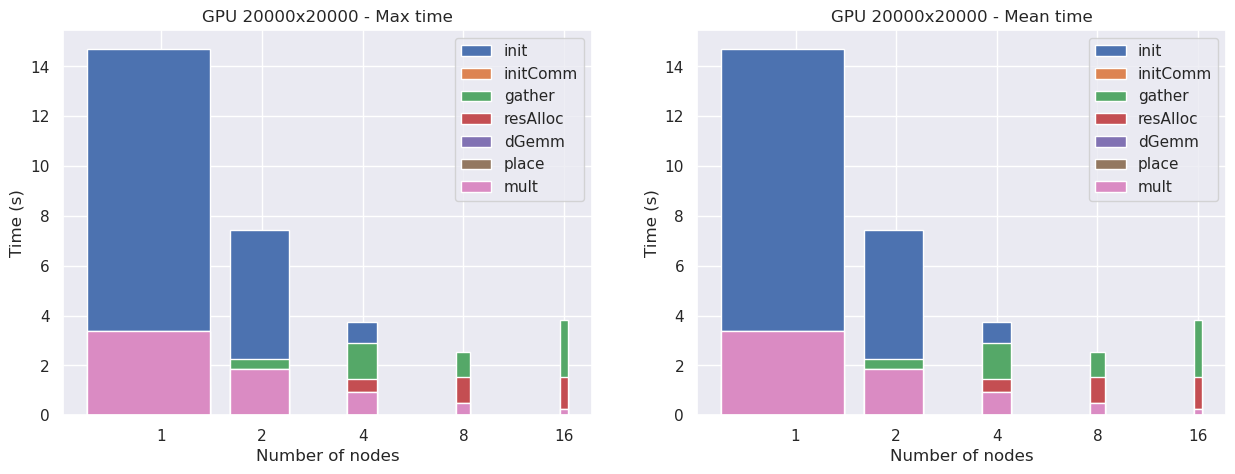

In [ ]:
plotDataStackBar("basic5000.csv",5,"CPU 5000")